[Conditional generation](#conditional_generation)\
[CDE samples](#cde_samples)\
[CDiffE samples](#cdiffe_samples)\
[SMCDiff samples](#smcdiff_samples)\
[Comparison](#comparison)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import functools
from sklearn import datasets
import matplotlib.pyplot as plt
from torch.optim import Adam
from torch.utils.data import DataLoader
from tqdm import notebook
import seaborn as sns
from ema_pytorch import EMA
import math
from torch.distributions import Normal 

#import models
from models import ScoreNet_2D

#import training fns
from training import loss_fn, train_model, CDE_loss_fn_2D

#import SDE functions
from SDE import marginal_prob_std_fn_2D as marginal_prob_std_fn
from SDE import diffusion_coeff_fn_2D as diffusion_coeff_fn

#import sampling functions
from sampling import Euler_Maruyama_sampler_2D as Euler_Maruyama_sampler
from sampling import pc_sampler_2D as pc_sampler
from sampling import ode_sampler_2D as ode_sampler
from sampling import CDE_Euler_Maruyama_sampler_2D as CDE_Euler_Maruyama_sampler
from sampling import CDE_pc_sampler_2D as CDE_pc_sampler
from sampling import CDiffE_Euler_Maruyama_sampler_2D as CDiffE_Euler_Maruyama_sampler
from sampling import CDiffE_pc_sampler_2D as CDiffE_pc_sampler
from sampling import SMCDiff_Euler_Maruyama_sampler_2D as SMCDiff_Euler_Maruyama_sampler
from sampling import SMCDiff_pc_sampler_2D as SMCDiff_pc_sampler
from sampling import SMCDiff_Euler_Maruyama_sampler_2D as SMCDiff_Euler_Maruyama_sampler

# Unconditional generation

## Generate training datasets

In [46]:
ex_1 = torch.load('data/ex_1.pt')
ex_2 = torch.load('data/ex_2.pt')
ex_3 = torch.load('data/ex_3.pt')

In [3]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [4]:
sum(p.numel() for p in score_model.parameters())

32210

## Train unconditional models

In [6]:
losses_1 = train_model(score_model, ex_1, loss_fn, marginal_prob_std_fn, 'ex_1_testtest.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


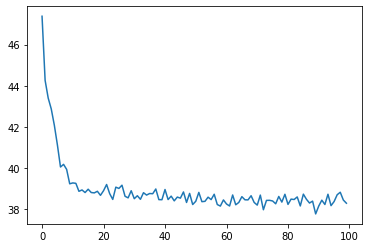

In [7]:
plt.plot(losses_1)

In [15]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [16]:
losses_2 = train_model(score_model, ex_2, loss_fn, marginal_prob_std_fn, 'ex_2_testtest.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

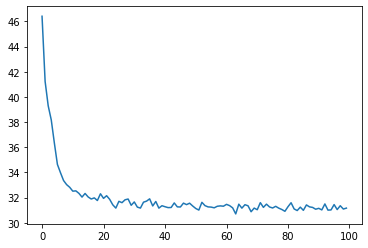

In [17]:
plt.plot(losses_2)

In [18]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [19]:
losses_3 = train_model(score_model, ex_3, loss_fn, marginal_prob_std_fn, 'ex_3_testtest.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

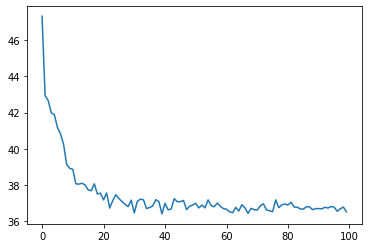

In [20]:
plt.plot(losses_3)

## Draw unconditional samples

### Example 1

In [8]:
ckpt = torch.load('ex_1_testtest.pth')
score_model.load_state_dict(ckpt)

<All keys matched successfully>

In [9]:
pc_samples = pc_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
e_m_samples = Euler_Maruyama_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
ode_samples = ode_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

Number of function evaluations: 266


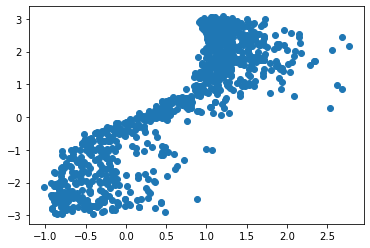

In [12]:
plt.scatter(pc_samples[:,0], pc_samples[:,1])

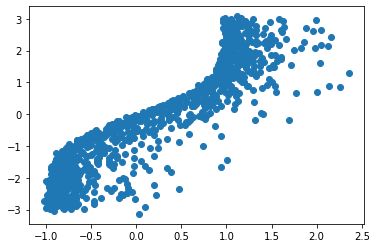

In [13]:
plt.scatter(e_m_samples[:,0], e_m_samples[:,1])

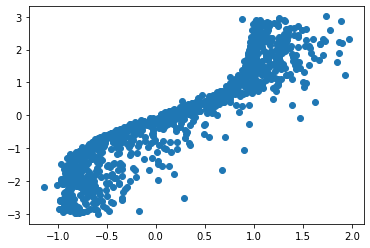

In [14]:
plt.scatter(ode_samples[:,0], ode_samples[:,1])

### Example 2

In [21]:
ckpt = torch.load('ex_2_testtest.pth')
score_model.load_state_dict(ckpt)

<All keys matched successfully>

In [22]:
pc_samples = pc_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
e_m_samples = Euler_Maruyama_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
ode_samples = ode_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

Number of function evaluations: 284


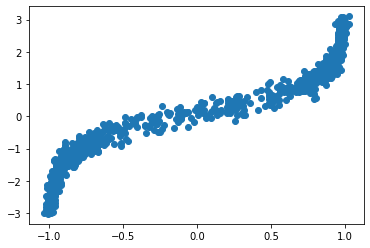

In [25]:
plt.scatter(pc_samples[:,0], pc_samples[:,1])

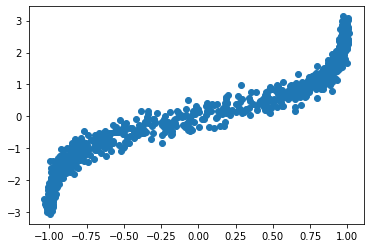

In [26]:
plt.scatter(e_m_samples[:,0], e_m_samples[:,1])

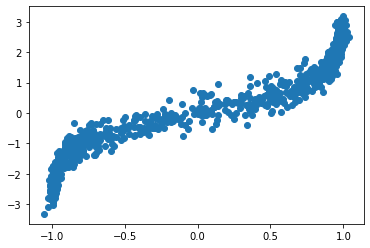

In [27]:
plt.scatter(ode_samples[:,0], ode_samples[:,1])

### Example 3

In [28]:
ckpt = torch.load('ex_3_testtest.pth')
score_model.load_state_dict(ckpt)

<All keys matched successfully>

In [29]:
pc_samples = pc_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [30]:
e_m_samples = Euler_Maruyama_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [31]:
ode_samples = ode_sampler(score_model, marginal_prob_std_fn, diffusion_coeff_fn, batch_size=1000)

Number of function evaluations: 266


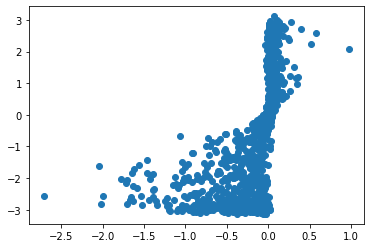

In [32]:
plt.scatter(pc_samples[:,0], pc_samples[:,1])

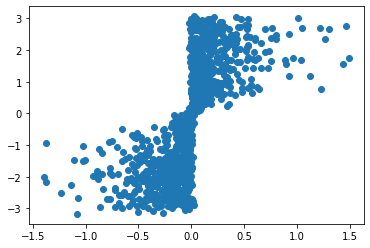

In [33]:
plt.scatter(e_m_samples[:,0], e_m_samples[:,1])

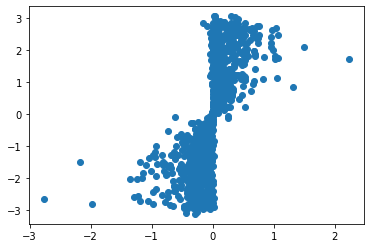

In [34]:
plt.scatter(ode_samples[:,0], ode_samples[:,1])

<hr style="border:4px solid black">

<a id='conditional_generation'></a>
# Conditional generation

## Generate testing datasets

In [4]:
actual_samples_pos = np.random.gamma(1,0.3, size = 100000) + np.tanh(1.2)
actual_samples_0 = np.random.gamma(1,0.3, size = 100000) + np.tanh(0)
actual_samples_neg = np.random.gamma(1,0.3, size = 100000) + np.tanh(-1.2)

In [5]:
actual_samples_pos_2 = np.tanh(np.random.normal(0,np.sqrt(0.05), size = 100000) + 1.2)
actual_samples_0_2 = np.tanh(np.random.normal(0,np.sqrt(0.05), size = 100000) + 0)
actual_samples_neg_2 = np.tanh(np.random.normal(0,np.sqrt(0.05), size = 100000) - 1.2)

In [6]:
actual_samples_pos_3 = np.random.gamma(1,0.3, size=100000) * np.tanh(1.2)
actual_samples_neg_3 = np.random.gamma(1,0.3, size=100000) * np.tanh(-1.2)

## Train conditional model

Have a bunch of training points (x,y). Then only forward diffuse the x components, so we get to (x_N, y). Then train NN to approximate the score with inputs (x_t, y, t), and the same loss as the unconditional method.

In [44]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [47]:
losses_1 = train_model(score_model, ex_1, CDE_loss_fn_2D, marginal_prob_std_fn, 'cde_1_testtest.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


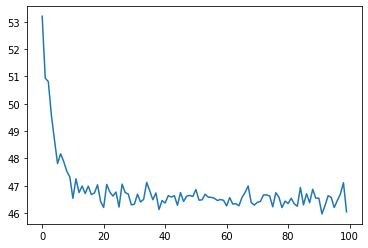

In [48]:
plt.plot(losses_1)

In [50]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [51]:
losses_2 = train_model(score_model, ex_2, CDE_loss_fn_2D, marginal_prob_std_fn, 'cde_2_testtest.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

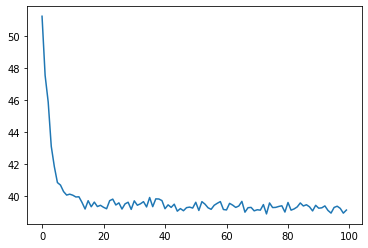

In [52]:
plt.plot(losses_2)

In [53]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)

In [54]:
losses_3 = train_model(score_model, ex_3, CDE_loss_fn_2D, marginal_prob_std_fn, 'cde_3_testtest.pth', epochs = 100, batch_size = 64)

  0%|          | 0/100 [00:00<?, ?it/s]

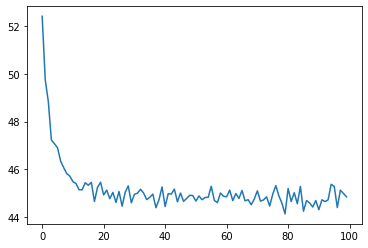

In [55]:
plt.plot(losses_3)

<a id='cde_samples'></a>
## Draw CDE samples

### Example 1

In [78]:
ckpt = torch.load('cde_1_testtest.pth')
score_model.load_state_dict(ckpt)
cde_samples_0 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000)
cde_samples_pos = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)
cde_samples_neg = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

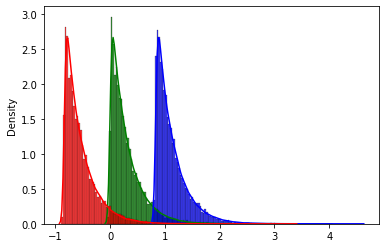

In [91]:
sns.kdeplot(actual_samples_0, color = 'green')
sns.histplot(cde_samples_0[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos, color = 'blue')
sns.histplot(cde_samples_pos[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg, color = 'red')
sns.histplot(cde_samples_neg[:,0], stat = 'density', color = 'red')

### Example 2

In [79]:
ckpt = torch.load('cde_2_testtest.pth')
score_model.load_state_dict(ckpt)
cde_samples_0_2 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000)
cde_samples_pos_2 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)
cde_samples_neg_2 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

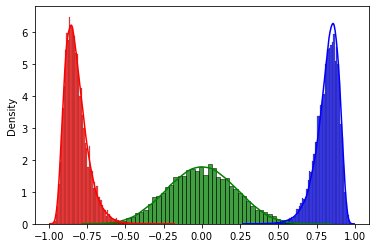

In [92]:
sns.kdeplot(actual_samples_0_2, color = 'green')
sns.histplot(cde_samples_0_2[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos_2, color = 'blue')
sns.histplot(cde_samples_pos_2[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_2, color = 'red')
sns.histplot(cde_samples_neg_2[:,0], stat = 'density', color = 'red')

### Example 3

In [80]:
ckpt = torch.load('cde_3_testtest.pth')
score_model.load_state_dict(ckpt)

cde_samples_pos_3 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)
cde_samples_neg_3 = CDE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

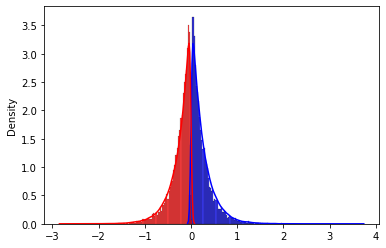

In [93]:
sns.kdeplot(actual_samples_pos_3, color = 'blue')
sns.histplot(cde_samples_pos_3[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_3, color = 'red')
sns.histplot(cde_samples_neg_3[:,0], stat = 'density', color = 'red')

In [115]:
torch.save(cde_samples_0, 'data/cde_0_1.pt')
torch.save(cde_samples_pos, 'data/cde_pos_1.pt')
torch.save(cde_samples_neg, 'data/cde_neg_1.pt')

torch.save(cde_samples_0_2, 'data/cde_0_2.pt')
torch.save(cde_samples_pos_2, 'data/cde_pos_2.pt')
torch.save(cde_samples_neg_2, 'data/cde_neg_2.pt')

torch.save(cde_samples_pos_3, 'data/cde_pos_3.pt')
torch.save(cde_samples_neg_3, 'data/cde_neg_3.pt')

<hr style="border:2px solid black">

<a id='cdiffe_samples'></a>
## Draw CDiffE samples

### Example 1

In [104]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('ex_1_testtest.pth')
score_model.load_state_dict(ckpt)
cdiffe_samples_0 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000)

cdiffe_samples_neg = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

cdiffe_samples_pos = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)

/Users/harryamad/Google Drive/2022/Dissertation/conditional_diffusion_simulation/SDE.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

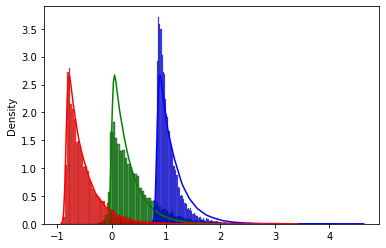

In [105]:
sns.kdeplot(actual_samples_0, color = 'green')
sns.histplot(cdiffe_samples_0[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos, color = 'blue')
sns.histplot(cdiffe_samples_pos[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg, color = 'red')
sns.histplot(cdiffe_samples_neg[:,0], stat = 'density', color = 'red')

### Example 2

In [82]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('ex_2_testtest.pth')
score_model.load_state_dict(ckpt)
cdiffe_samples_0_2 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), batch_size = 10000)

cdiffe_samples_neg_2 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

cdiffe_samples_pos_2 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

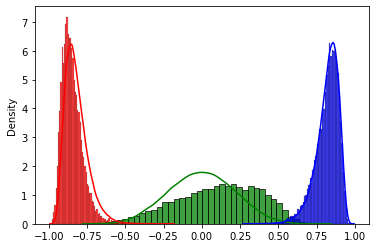

In [94]:
sns.kdeplot(actual_samples_0_2, color = 'green')
sns.histplot(cdiffe_samples_0_2[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos_2, color = 'blue')
sns.histplot(cdiffe_samples_pos_2[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_2, color = 'red')
sns.histplot(cdiffe_samples_neg_2[:,0], stat = 'density', color = 'red')

### Example 3

In [83]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('ex_3_testtest.pth')
score_model.load_state_dict(ckpt)

cdiffe_samples_neg_3 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), batch_size = 10000)

cdiffe_samples_pos_3 = CDiffE_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), batch_size = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

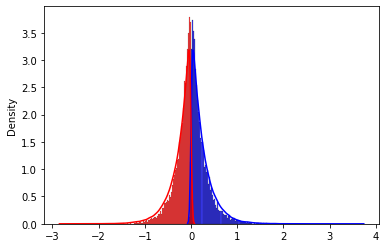

In [95]:
sns.kdeplot(actual_samples_pos_3, color = 'blue')
sns.histplot(cdiffe_samples_pos_3[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_3, color = 'red')
sns.histplot(cdiffe_samples_neg_3[:,0], stat = 'density', color = 'red')

In [116]:
torch.save(cdiffe_samples_0, 'data/cdiffe_0_1.pt')
torch.save(cdiffe_samples_pos, 'data/cdiffe_pos_1.pt')
torch.save(cdiffe_samples_neg, 'data/cdiffe_neg_1.pt')

torch.save(cdiffe_samples_0_2, 'data/cdiffe_0_2.pt')
torch.save(cdiffe_samples_pos_2, 'data/cdiffe_pos_2.pt')
torch.save(cdiffe_samples_neg_2, 'data/cdiffe_neg_2.pt')

torch.save(cdiffe_samples_pos_3, 'data/cdiffe_pos_3.pt')
torch.save(cdiffe_samples_neg_3, 'data/cdiffe_neg_3.pt')

<hr style="border:2px solid black">

<a id='smcdiff_samples'></a>
## Draw SMCDiff samples

## Example 1

In [84]:
score_model = ScoreNet_2D(marginal_prob_std=marginal_prob_std_fn)
ckpt = torch.load('ex_1_testtest.pth')
score_model.load_state_dict(ckpt)

smcdiff_samples_0 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), k = 10000)

smcdiff_samples_pos = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 10000)

smcdiff_samples_neg = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

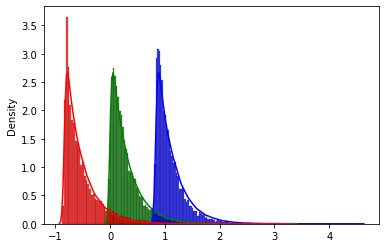

In [96]:
sns.kdeplot(actual_samples_0, color = 'green')
sns.histplot(smcdiff_samples_0[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos, color = 'blue')
sns.histplot(smcdiff_samples_pos[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg, color = 'red')
sns.histplot(smcdiff_samples_neg[:,0], stat = 'density', color = 'red')

## Example 2

In [85]:
ckpt = torch.load('ex_2_testtest.pth')
score_model.load_state_dict(ckpt)

smcdiff_samples_0_2 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(0, dtype = torch.float32), k = 10000)

smcdiff_samples_pos_2 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 10000)

smcdiff_samples_neg_2 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

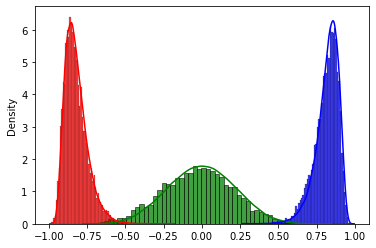

In [97]:
sns.kdeplot(actual_samples_0_2, color = 'green')
sns.histplot(smcdiff_samples_0_2[:,0], stat = 'density', color = 'green')
sns.kdeplot(actual_samples_pos_2, color = 'blue')
sns.histplot(smcdiff_samples_pos_2[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_2, color = 'red')
sns.histplot(smcdiff_samples_neg_2[:,0], stat = 'density', color = 'red')

## Example 3

In [86]:
ckpt = torch.load('ex_3_testtest.pth')
score_model.load_state_dict(ckpt)

smcdiff_samples_pos_3 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(1.2, dtype = torch.float32), k = 10000)

smcdiff_samples_neg_3 = SMCDiff_Euler_Maruyama_sampler(score_model, 
                           marginal_prob_std_fn,
                           diffusion_coeff_fn, 
                           y_obs = torch.tensor(-1.2, dtype = torch.float32), k = 10000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

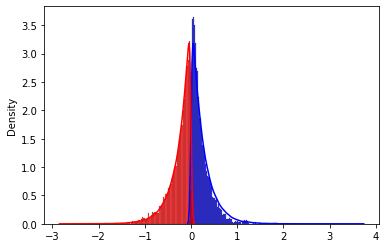

In [98]:
sns.kdeplot(actual_samples_pos_3, color = 'blue')
sns.histplot(smcdiff_samples_pos_3[:,0], stat = 'density', color = 'blue')
sns.kdeplot(actual_samples_neg_3, color = 'red')
sns.histplot(smcdiff_samples_neg_3[:,0], stat = 'density', color = 'red')

In [117]:
torch.save(smcdiff_samples_0, 'data/smcdiff_0_1.pt')
torch.save(smcdiff_samples_pos, 'data/smcdiff_pos_1.pt')
torch.save(smcdiff_samples_neg, 'data/smcdiff_neg_1.pt')

torch.save(smcdiff_samples_0_2, 'data/smcdiff_0_2.pt')
torch.save(smcdiff_samples_pos_2, 'data/smcdiff_pos_2.pt')
torch.save(smcdiff_samples_neg_2, 'data/smcdiff_neg_2.pt')

torch.save(smcdiff_samples_pos_3, 'data/smcdiff_pos_3.pt')
torch.save(smcdiff_samples_neg_3, 'data/smcdiff_neg_3.pt')

<hr style="border:4px solid black">

<a id='comparison'></a>
# Comparison

In [33]:
cde_samples_0 = torch.load('data/cde_0_1.pt')
cde_samples_pos = torch.load('data/cde_pos_1.pt')
cde_samples_neg = torch.load('data/cde_neg_1.pt')
cde_samples_0_2 = torch.load('data/cde_0_2.pt')
cde_samples_pos_2 = torch.load('data/cde_pos_2.pt')
cde_samples_neg_2 = torch.load('data/cde_neg_2.pt')
cde_samples_pos_3 = torch.load('data/cde_pos_3.pt')
cde_samples_neg_3 = torch.load('data/cde_neg_3.pt')

In [ ]:
cdiffe_samples_0 = torch.load('data/cdiffe_0_1.pt')
cdiffe_samples_pos = torch.load('data/cdiffe_pos_1.pt')
cdiffe_samples_neg = torch.load('data/cdiffe_neg_1.pt')
cdiffe_samples_0_2 = torch.load('data/cdiffe_0_2.pt')
cdiffe_samples_pos_2 = torch.load('data/cdiffe_pos_2.pt')
cdiffe_samples_neg_2 = torch.load('data/cdiffe_neg_2.pt')
cdiffe_samples_pos_3 = torch.load('data/cdiffe_pos_3.pt')
cdiffe_samples_neg_3 = torch.load('data/cdiffe_neg_3.pt')

In [ ]:
smcdiff_samples_0 = torch.load('data/smcdiff_0_1.pt')
smcdiff_samples_pos = torch.load('data/smcdiff_pos_1.pt')
smcdiff_samples_neg = torch.load('data/smcdiff_neg_1.pt')
smcdiff_samples_0_2 = torch.load('data/smcdiff_0_2.pt')
smcdiff_samples_pos_2 = torch.load('data/smcdiff_pos_2.pt')
smcdiff_samples_neg_2 = torch.load('data/smcdiff_neg_2.pt')
smcdiff_samples_pos_3 = torch.load('data/smcdiff_pos_3.pt')
smcdiff_samples_neg_3 = torch.load('data/smcdiff_neg_3.pt')

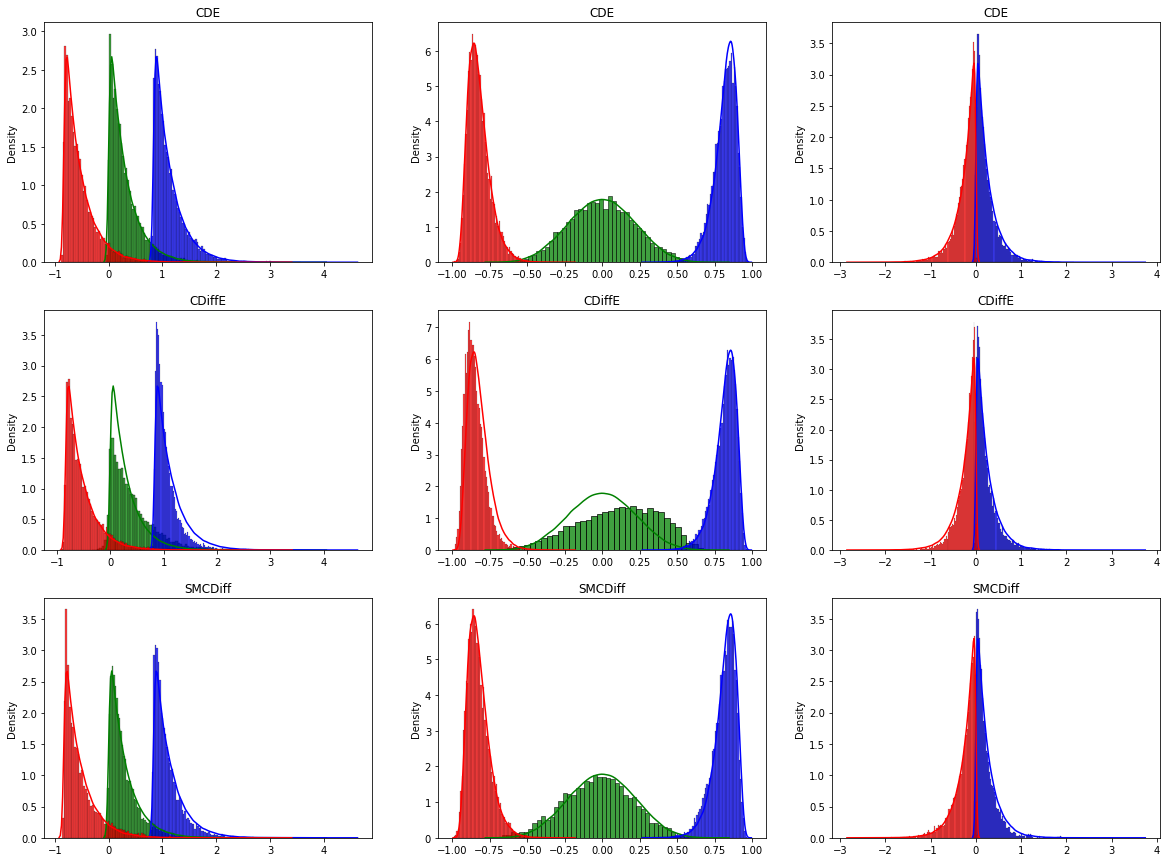

In [106]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))

def plot_row(s1,s2,s3,s4,s5,s6,s7,s8,row,title):
    sns.kdeplot(actual_samples_0, color = 'green', ax = axs[row,0])
    sns.histplot(s1[:,0], stat = 'density', color = 'green', ax = axs[row,0])
    sns.kdeplot(actual_samples_pos, color = 'blue', ax = axs[row,0])
    sns.histplot(s2[:,0], stat = 'density', color = 'blue', ax = axs[row,0])
    sns.kdeplot(actual_samples_neg, color = 'red', ax = axs[row,0])
    sns.histplot(s3[:,0], stat = 'density', color = 'red', ax = axs[row,0])

    sns.kdeplot(actual_samples_0_2, color = 'green', ax = axs[row,1])
    sns.histplot(s4[:,0], stat = 'density', color = 'green', ax = axs[row,1])
    sns.kdeplot(actual_samples_pos_2, color = 'blue', ax = axs[row,1])
    sns.histplot(s5[:,0], stat = 'density', color = 'blue', ax = axs[row,1])
    sns.kdeplot(actual_samples_neg_2, color = 'red', ax = axs[row,1])
    sns.histplot(s6[:,0], stat = 'density', color = 'red', ax = axs[row,1])

    sns.kdeplot(actual_samples_pos_3, color = 'blue', ax = axs[row,2])
    sns.histplot(s7[:,0], stat = 'density', color = 'blue', ax = axs[row,2])
    sns.kdeplot(actual_samples_neg_3, color = 'red', ax = axs[row,2])
    sns.histplot(s8[:,0], stat = 'density', color = 'red', ax = axs[row,2])

    axs[row,0].set_title(title)
    axs[row,1].set_title(title)
    axs[row,2].set_title(title)
    
plot_row(cde_samples_0, cde_samples_pos, cde_samples_neg, 
         cde_samples_0_2, cde_samples_pos_2, cde_samples_neg_2,
         cde_samples_pos_3, cde_samples_neg_3, 0, 'CDE')

plot_row(cdiffe_samples_0, cdiffe_samples_pos, cdiffe_samples_neg, 
         cdiffe_samples_0_2, cdiffe_samples_pos_2, cdiffe_samples_neg_2,
         cdiffe_samples_pos_3, cdiffe_samples_neg_3, 1, 'CDiffE')

plot_row(smcdiff_samples_0, smcdiff_samples_pos, smcdiff_samples_neg, 
         smcdiff_samples_0_2, smcdiff_samples_pos_2, smcdiff_samples_neg_2,
         smcdiff_samples_pos_3, smcdiff_samples_neg_3, 2, 'SMCDiff')

In [107]:
print(np.mean(actual_samples_0))
print(f'CDE: {torch.mean(cde_samples_0)}')
print(f'Replacement: {torch.mean(cdiffe_samples_0)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_0)}')

0.29965214542585
CDE: 0.15127044916152954
Replacement: 0.2004857361316681
SMCDiff: 0.13905742764472961


In [108]:
print(np.mean(actual_samples_pos))
print(f'CDE: {torch.mean(cde_samples_pos)}')
print(f'Replacement: {torch.mean(cdiffe_samples_pos)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_pos)}')

1.132915328763519
CDE: 1.162000060081482
Replacement: 1.1245893239974976
SMCDiff: 1.1433902978897095


In [109]:
print(np.mean(actual_samples_neg))
print(f'CDE: {torch.mean(cde_samples_neg)}')
print(f'Replacement: {torch.mean(cdiffe_samples_neg)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_neg)}')

-0.5335936244721803
CDE: -0.8671630620956421
Replacement: -0.8539907932281494
SMCDiff: -0.8584296107292175


In [110]:
print(np.mean(actual_samples_0_2))
print(f'CDE: {torch.mean(cde_samples_0_2)}')
print(f'Replacement: {torch.mean(cdiffe_samples_0_2)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_0_2)}')

-0.0011139924175424154
CDE: -0.0004396461008582264
Replacement: 0.0518239364027977
SMCDiff: -0.015829075127840042


In [111]:
print(np.mean(actual_samples_pos_2))
print(f'CDE: {torch.mean(cde_samples_pos_2)}')
print(f'Replacement: {torch.mean(cdiffe_samples_pos_2)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_pos_2)}')

0.8207492941315615
CDE: 1.0078777074813843
Replacement: 1.008090615272522
SMCDiff: 1.0048093795776367


In [112]:
print(np.mean(actual_samples_neg_2))
print(f'CDE: {torch.mean(cde_samples_neg_2)}')
print(f'Replacement: {torch.mean(cdiffe_samples_neg_2)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_neg_2)}')

-0.820888660566178
CDE: -1.0096595287322998
Replacement: -1.0242892503738403
SMCDiff: -1.0115984678268433


In [113]:
print(np.mean(actual_samples_pos_3))
print(f'CDE: {torch.mean(cde_samples_pos_3)}')
print(f'Replacement: {torch.mean(cdiffe_samples_pos_3)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_pos_3)}')

0.2503862510127431
CDE: 0.7141533493995667
Replacement: 0.7098875641822815
SMCDiff: 0.7073259949684143


In [114]:
print(np.mean(actual_samples_neg_3))
print(f'CDE: {torch.mean(cde_samples_neg_3)}')
print(f'Replacement: {torch.mean(cdiffe_samples_neg_3)}')
print(f'SMCDiff: {torch.mean(smcdiff_samples_neg_3)}')

-0.2505118441232006
CDE: -0.7241255044937134
Replacement: -0.7052574753761292
SMCDiff: -0.7308341860771179
